In [35]:
from tqdm.notebook import tqdm
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [ ]:
nltk.download('stopwords')
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Data analysis (biography)

In [2]:
df = pd.read_parquet('data/text_data.parquet.gzip')
# df = df.loc[df['id'].str[0] == 'f']

In [3]:
df['split_text'] = df['text'].apply(lambda x: re.split(' |\.|,|;|!|\?|\"|/|\(|\)|\[|]|&|:|-|\' |=', x.lower()))

In [4]:
df_word_counts = df['split_text'].explode().value_counts()
relevant_words = set(df_word_counts.loc[(df_word_counts >= 10) & (df_word_counts <= 500)].index)
# relevant_words

In [5]:
word_ratings_temp = {}
def word_to_rating(row):
    for word in row['split_text']:
        if word in word_ratings_temp:
            word_ratings_temp[word].append(row['avg_rating'])
        else:
            word_ratings_temp[word] = [row['avg_rating']]

In [6]:
test = df.apply(lambda x: word_to_rating(x), axis=1)

In [7]:
word_ratings = {'word': [], 'avg_rating': []}
for word, ratings in word_ratings_temp.items():
    if word in relevant_words:
        word_ratings['word'].append(word)
        word_ratings['avg_rating'].append(np.mean(ratings))
df_word_ratings = pd.DataFrame(word_ratings)

In [8]:
df.loc[df['text'].str.contains('basketball')]

,id,number_ratings,avg_rating,text,split_text
185,f_0186,12455,9.8,"I'm a Dancer,Gymnastics,i play rugby,volleybal...","[i'm, a, dancer, gymnastics, i, play, rugby, v..."
367,f_0368,4970,9.8,so i like sports i used to do cheerleading i l...,"[so, i, like, sports, i, used, to, do, cheerle..."
522,f_0523,11558,9.2,hey im jessica im 5 5 and yes i no im short i ...,"[hey, im, jessica, im, 5, 5, and, yes, i, no, ..."
695,f_0696,7324,9.8,"Hey I'm Amanda. Im a very sweet, funny, and cu...","[hey, i'm, amanda, , im, a, very, sweet, , fun..."
834,f_0835,15289,9.4,"I'm an easy going person. I like camping, tra...","[i'm, an, easy, going, person, , , i, like, ca..."
862,f_0863,8427,9.4,"I enjoy life, play guitar, love basketball, an...","[i, enjoy, life, , play, guitar, , love, baske..."
1188,m_0189,11371,9.1,"Hi Im Jason. Im originally from Pittsburgh, P...","[hi, im, jason, , , im, originally, from, pitt..."
1425,m_0426,111,9.4,"My name is Isaac, im almost 20 and going to co...","[my, name, is, isaac, , im, almost, 20, and, g..."
1649,m_0650,4055,8.9,Hey What's up..I'm Jay. I like to hang out wit...,"[hey, what's, up, , i'm, jay, , i, like, to, h..."
1675,m_0676,785,9.6,"utica, ny. interests include basketball, shawn...","[utica, , ny, , interests, include, basketball..."


In [10]:
df

,id,number_ratings,avg_rating,text,split_text
0,f_0001,1824,9.3,It's difficult to write about ones self. But h...,"[it's, difficult, to, write, about, ones, self..."
1,f_0002,2755,9.6,"25, ft. wayne IN. When Im not working I love g...","[25, , ft, , wayne, in, , when, im, not, worki..."
2,f_0003,9396,7.3,Hi I am single and looking for that special so...,"[hi, i, am, single, and, looking, for, that, s..."
3,f_0004,1422,8.3,"Hello! Living in my fabulous 40's, free-spirit...","[hello, , living, in, my, fabulous, 40's, , fr..."
4,f_0005,177762,9.5,Hello fellow Hotties or Notties! Moved 2 Color...,"[hello, fellow, hotties, or, notties, , moved,..."
...,...,...,...,...,...
1995,m_0996,1549,9.1,Let me know what u think,"[let, me, know, what, u, think]"
1996,m_0997,1418,8.5,I look forward to hearing from you all and ple...,"[i, look, forward, to, hearing, from, you, all..."
1997,m_0998,1892,9.6,I hate the people according to the pals and I ...,"[i, hate, the, people, according, to, the, pal..."
1998,m_0999,1919,9.4,"Spanish guy, nice, easy going, looking for peo...","[spanish, guy, , nice, , easy, going, , lookin..."


In [13]:
df_word_ratings.sort_values(by='avg_rating', ascending=False, inplace=True)
df_word_ratings

,word,avg_rating
618,basketball,9.430769
373,absolutely,9.416667
619,basically,9.381818
205,characters,9.370000
656,gym,9.364706
...,...,...
345,wit,7.983333
231,become,7.921429
253,female,7.911765
537,boyfriend,7.853846


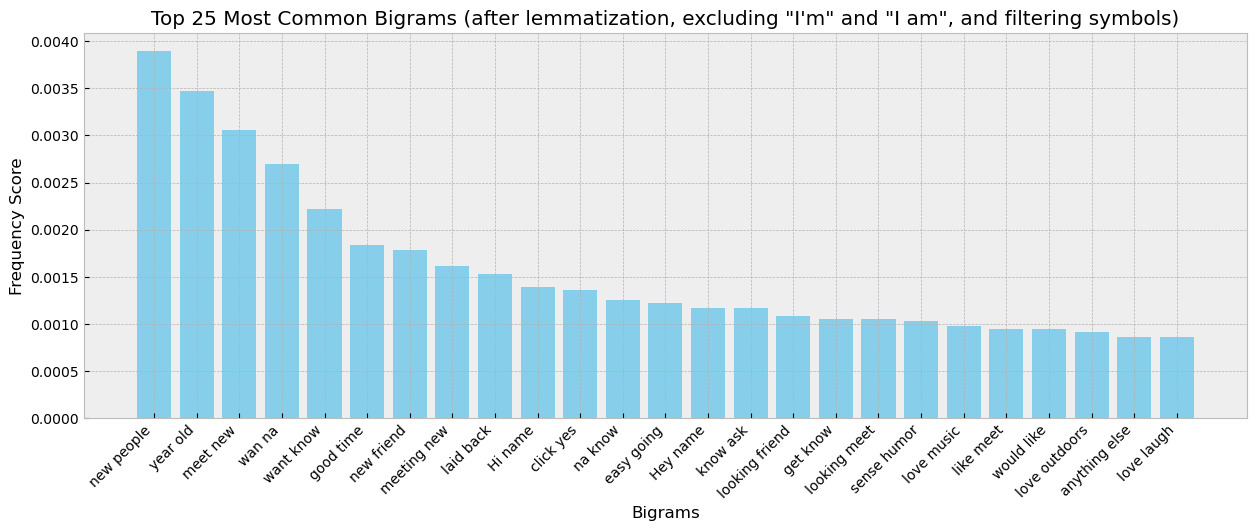

In [40]:
# Tokenize words, perform lemmatization, and remove stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words and word.lower() not in ["i'm", "i am",'I']]
    # Filter out non-alphabetic characters
    words = [word for word in words if re.match('^[a-zA-Z]+$', word)]
    return words

df['tokenized_text'] = df['text'].apply(preprocess_text)

# Combine all tokenized texts into one list of words
all_words = [word for sublist in df['tokenized_text'] for word in sublist]

# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in the combined text
bio_finder = BigramCollocationFinder.from_words(all_words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

# Top 25 most common bigrams
top_bigrams = bio_scored[:25]

# Creating a list of the bigrams
bg = [' '.join(bigram) for bigram, score in top_bigrams]

# Creating a list of the frequency scores
bio_scores = [score for bigram, score in top_bigrams]

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15, 5))

plt.bar(bg, bio_scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 25 Most Common Bigrams (after lemmatization, excluding "I\'m" ,"I" ,"I am" and filtering symbols)')
plt.xlabel('Bigrams')
plt.ylabel('Frequency Score')
plt.show()


Number of unique words:  6419


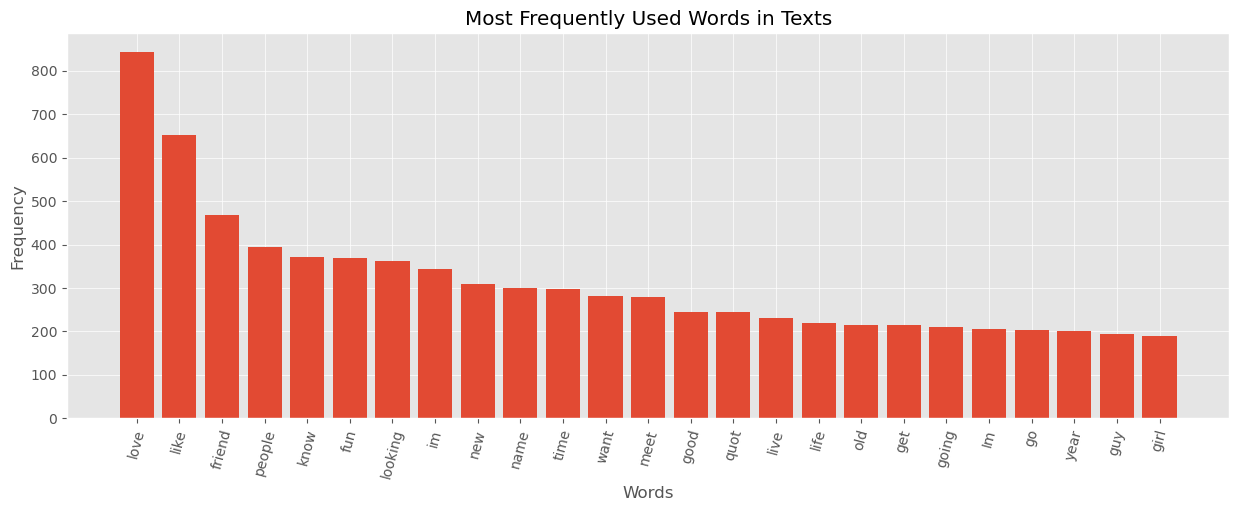

In [43]:
# Combine all tokenized texts into one list of words
all_words = [word for sublist in df['tokenized_text'] for word in sublist]

# Creating a set list that will only take in unique words
total_vocab = set(all_words)

# Printing out the number of unique words in all the texts combined
print("Number of unique words: ", len(total_vocab))

# Determining the use frequency of each word in all the texts
word_freq = FreqDist(all_words)

# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))

plt.bar(*zip(*word_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()